In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
from scipy.spatial import distance

from numpy import array, array_equal, allclose

In [3]:
pi = np.pi
m = 100
C = 1
eps = C*((np.log(m))**(3/4))/(m**(1/2))
ker = 1/(pi*eps**2)
omega_pts1 = (0,1)
omega_pts2 = (2,3)
omega_pts3 = (4,5)

In [4]:
X1 = [np.random.uniform(omega_pts1[0],omega_pts1[1],(2,1)) for _ in range(m)]
X2 = [np.random.uniform(omega_pts2[0],omega_pts2[1],(2,1)) for _ in range(m)]
X3 = [np.random.uniform(omega_pts3[0],omega_pts3[1],(2,1)) for _ in range(m)]

In [6]:
X

NameError: name 'X' is not defined

In [5]:
def get_ordered_pairs(X):
    pairs_x = []
    pairs_y = []
    for i in range(len(X)):
        pairs_x.append(X[i][0][0])
        pairs_y.append(X[i][1][0])
    return pairs_x, pairs_y

In [6]:
pairs_1x, pairs_1y = get_ordered_pairs(X1)
pairs_2x, pairs_2y = get_ordered_pairs(X2)
pairs_3x, pairs_3y = get_ordered_pairs(X3)

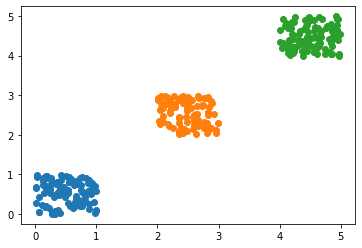

In [7]:
plt.scatter(pairs_1x, pairs_1y)
plt.scatter(pairs_2x, pairs_2y)
plt.scatter(pairs_3x, pairs_3y)

Constructing K-NN graph

In [8]:
k = 5

In [9]:
X_1 = np.array([pairs_1x,pairs_1y]).T
X_2 = np.array([pairs_2x,pairs_2y]).T
X_3 = np.array([pairs_3x,pairs_3y]).T

In [10]:
distance_matrix = np.zeros((3*m,3*m))
X = np.concatenate([X_1,X_2,X_3],axis=0)
for i in range(len(X)):
    for j in range(len(X)):
        distance_matrix[i][j] = distance.euclidean(X[i],X[j])
distance_matrix += np.eye(3*m)*2e10

In [11]:
nearest_neighbours_idx = [list(i.argsort()[:k]) for i in distance_matrix]

In [12]:
nearest_neighbours = [X[i] for i in nearest_neighbours_idx]
nearest_neighbours = [list(i) for i in nearest_neighbours]

In [13]:
def arreq_in_list(myarr, list_arrays):
    return next((True for elem in list_arrays if array_equal(elem, myarr)), False)

In [14]:
rbf = lambda x1, x2, gamma:  np.exp(-gamma*np.linalg.norm(x1-x2)**2)

In [249]:
W = np.zeros((3*m,3*m))
for i in range(len(X)):
    for j in range(len(nearest_neighbours)):
        if arreq_in_list(X[i],nearest_neighbours[j]) or arreq_in_list(X[j],nearest_neighbours[i]):
            W[i][j] = rbf(X[i],X[j],0.5)

In [250]:
np.unique(W == W.T)

array([ True])

In [252]:
d = np.sum(W,axis=1)
D = np.diag(d)
D_2 = np.sqrt(D)
D_inv = np.linalg.inv(D_2)
L = D_inv@(D-W)@D_inv

In [16]:
from KNN import KNN

In [17]:
L, W = KNN(X,k,m,rbf)

In [18]:
L

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])